<h1 style="text-align: center;">10. Домашнє завдання до модуля «Вступ до NLP»
</h1>
<h2 style="text-align: center;">.</h2>

🎢 Домашнє завдання до модуля «Вступ до NLP»

Вітаємо в домашньому завданні до модуля «Вступ до NLP»! 🙂
У сучасному цифровому світі електронна пошта залишається одним з основних засобів комунікації. Однак разом з корисними повідомленнями, користувачі часто отримують небажану кореспонденцію — спам. Автоматична фільтрація спаму є важливим завданням для забезпечення ефективної роботи з електронною поштою.

Ваше завдання сьогодні — створити модель, яка зможе відрізняти спам від легітимних повідомлень, використовуючи техніки роботи з текстовими даними.
Модель глибокого навчання має класифікувати електронні листи на спам (небажані повідомлення) та «ham» (легітимні повідомлення) на основі наданого набору даних Email Spam Detection Dataset, який містить зразки електронних листів, класифікованих як спам або ham.

Вам потрібно:
1. Провести попередній аналіз даних.
2. Підготувати дані для навчання моделі.
3. Застосувати методи на основі підрахунку та використати попередньо навчені ембедінги для представлення текстових даних та побудови моделі класифікації.
4. Оцінити ефективність моделі та інтерпретувати результати.


Покрокова інструкція виконання
1. Здійсніть імпорт необхідних бібліотек.
2. Підготовка даних:
Завантажте набір даних Email Spam Detection Dataset.
Розділіть дані на навчальний та валідаційний набори.
Оцініть розподіл цільової змінної.
Проведіть попередню обробку тексту: видаліть спеціальні символи, приведіть до нижнього регістру, видаліть стоп-слова тощо.
Розбийте дані на навчальну та валідаційну вибірки.
3. Застосування методів BoW та TF-IDF:
Використайте CountVectorizer та TfidfVectorizer з бібліотеки sklearn для перетворення текстових даних у числові вектори.
Налаштуйте параметри (наприклад, max_features, ngram_range).
Застосуйте BoW та TF-IDF до навчального та валідаційного наборів даних.
4. Використання попередньо навчених ембедингів:
Оберіть модель попередньо навчених ембедингів (наприклад, Word2Vec, GloVe або FastText).
Завантажте обрану модель ембедингів.
Створіть функцію для перетворення текстових даних у вектори ембедингів.
Застосуйте цю функцію до навчального та валідаційного наборів даних.
5. Побудова та навчання моделей:
Створіть модель машинного навчання (наприклад, LogisticRegression, RandomForestRegressor) для даних, перетворених за допомогою BoW та TF-IDF.
Навчіть модель на даних, перетворених за допомогою BoW та TF-IDF.
Створіть іншу модель для даних з попередньо навченими ембедингами.
Навчіть цю модель на даних, перетворених за допомогою ембедингів.
6. Оцінка моделей:
Зробіть прогнози на валідаційному наборі даних для всіх моделей.
Обчисліть метрики ефективності (наприклад, AUC, Accuracy). Обґрунтуйте вибір метрики.
Порівняйте результати моделей, що використовують BoW та TF-IDF, та попередньо навчені ембединги.
7. Аналіз та інтерпретація результатів:
Визначте, яка модель працює краще для задачі класифікації спаму.
Опишіть переваги та недоліки кожного підходу.
8. Вдосконалення моделі (опціонально):
Спробуйте різні алгоритми класифікації.
Налаштуйте гіперпараметри моделей.


Орієнтовний очікуваний результат
Орієнтовні результати метрик можуть бути наступними:
1. Точність (Accuracy):
з використанням BoW та TF-IDF: 82-85%,
з використанням ембедингів: 80-83%.
2. AUC (Area Under the Curve):
з використанням BoW та TF-IDF: 0.84-0.87,
з використанням ембедингів: 0.82-0.85
☝🏻 Варто зазначити, що ці показники є орієнтовними і можуть варіюватися залежно від:
- якості та розміру набору даних,
- попередньої обробки даних,
- гіперпараметрів моделі,
- випадковості при ініціалізації ваг та розділенні даних.

Також важливо пам'ятати, що дуже високі показники (близькі до 100%) можуть свідчити про перенавчання (overfitting) моделі, особливо якщо вони значно відрізняються між навчальним та валідаційним наборами даних.

## 1. **Import the required libraries.**

In [ ]:
!pip install gensim

In [1]:
import os, re, sys, gc, math, json, random, string, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# Візуалізація (за бажанням)
import matplotlib.pyplot as plt

# НЛП-підготовка
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

# Ембеддинги (gensim)
import gensim.downloader as api

# 🔒 Відтворюваність
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

## 2. **Data loading:**

In [2]:
DATA_PATH = "spam.csv"

def load_email_dataset(path: str) -> pd.DataFrame:
    """
    Повертає DF з двома колонками:
      text: str
      label: int (1=spam, 0=ham)
    """
    df = pd.read_csv(path, encoding='ISO-8859-1')
    # Нормалізуємо назви
    lower_cols = {c.lower(): c for c in df.columns}
    # Варіанти можливих імен колонок
    text_candidates = [c for c in df.columns if c.lower() in {"text","message","emailtext","content","v2","body"}]
    label_candidates = [c for c in df.columns if c.lower() in {"label","category","class","target","v1"}]

    if not text_candidates or not label_candidates:
        raise ValueError(
            f"Не знайдено відповідних колонок. Є колонки: {list(df.columns)}.\n"
            "Очікуються щось на кшталт: text/message/emailtext/v2 для тексту та label/category/class/target/v1 для мітки."
        )

    text_col = text_candidates[0]
    label_col = label_candidates[0]

    # До бінарних міток
    df = df[[text_col, label_col]].rename(columns={text_col: "text", label_col: "raw_label"})
    df["text"] = df["text"].astype(str)

    # Уніфікація міток: 'spam'/'ham' або 1/0
    def to_binary(y):
        y = str(y).strip().lower()
        if y in {"spam","1","true","yes"}:
            return 1
        if y in {"ham","0","false","no","legit"}:
            return 0
        # якщо інший формат, спробуємо інтуїцію: будь-що, що містить "spam"
        return 1 if "spam" in y else 0

    df["label"] = df["raw_label"].apply(to_binary).astype(int)
    df = df.drop(columns=["raw_label"]).reset_index(drop=True)
    return df

df = load_email_dataset(DATA_PATH)
print(df.head())
print(df["label"].value_counts())
print(f"Розмір датасету: {df.shape}")

                                                text  label
0  Go until jurong point, crazy.. Available only ...      0
1                      Ok lar... Joking wif u oni...      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1
3  U dun say so early hor... U c already then say...      0
4  Nah I don't think he goes to usf, he lives aro...      0
label
0    4825
1     747
Name: count, dtype: int64
Розмір датасету: (5572, 2)


In [3]:
df.isna().mean().sort_values(ascending=False) 

text     0.0
label    0.0
dtype: float64

In [4]:
df.nunique()

text     5169
label       2
dtype: int64

## 3. **EDA:**

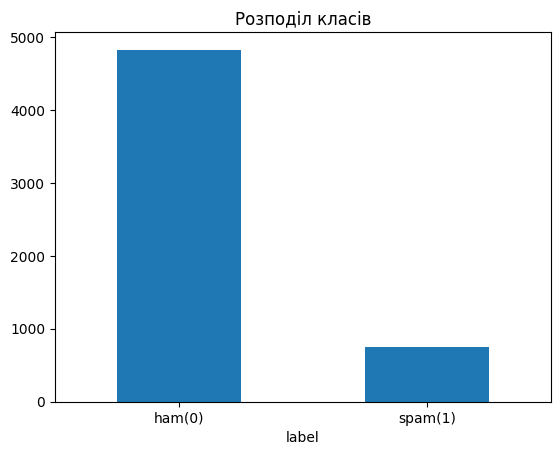

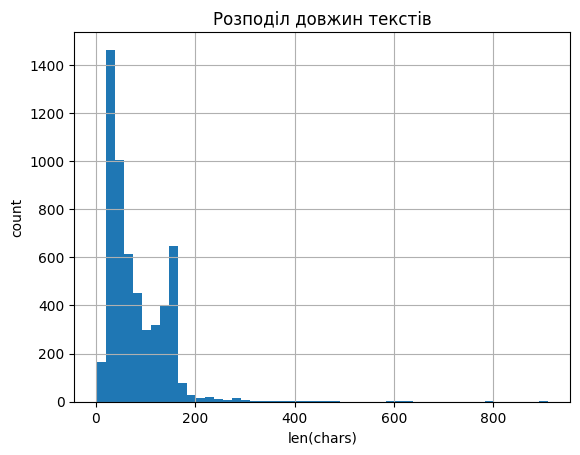


🔎 Приклади ham:
 ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', 'U dun say so early hor... U c already then say...']

🔎 Приклади spam:
 ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv", 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']


In [5]:
ax = df["label"].value_counts().sort_index().plot(kind="bar")
ax.set_xticklabels(["ham(0)","spam(1)"], rotation=0)
ax.set_title("Розподіл класів")
plt.show()

# Довжина листів
df["len"] = df["text"].str.len()
df["len"].hist(bins=50)
plt.title("Розподіл довжин текстів")
plt.xlabel("len(chars)")
plt.ylabel("count")
plt.show()

# Приклади
print("\n🔎 Приклади ham:\n", df[df.label==0]["text"].head(3).to_list())
print("\n🔎 Приклади spam:\n", df[df.label==1]["text"].head(3).to_list())

## 4. **Data preparation:**

In [9]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.5 MB/s  0:00:08m0:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
import pandas as pd
import spacy
import re

# --- КРОК 1: ЗАВАНТАЖЕННЯ МОДЕЛІ SPACY ---
# Завантажуємо малу англійську модель. Робимо це один раз.
# disable=["parser", "ner"] прискорює роботу, оскільки нам не потрібен синтаксичний аналіз та розпізнавання сутностей.
try:
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    print("✅ Модель spaCy 'en_core_web_sm' успішно завантажена.")
except OSError:
    print("❌ Модель 'en_core_web_sm' не знайдена. Будь ласка, виконайте в терміналі:")
    print("   python -m spacy download en_core_web_sm")


# --- КРОК 2: НОВА ФУНКЦІЯ ОЧИЩЕННЯ НА БАЗІ SPACY ---

def clean_text_spacy(text):
    """Функція очищення тексту з використанням spaCy."""
    text = str(text).lower()  # Перетворення на нижній регістр
    text = re.sub(r'<.*?>', '', text)  # Видалення HTML тегів
    text = re.sub(r'\d+', '', text)  # Видалення цифр
    
    # Обробляємо текст за допомогою spaCy
    doc = nlp(text)
    
    # Лематизація та видалення стоп-слів і пунктуації
    cleaned_tokens = [
        token.lemma_ for token in doc 
        if not token.is_stop and not token.is_punct and len(token.lemma_) > 2
    ]
    
    return " ".join(cleaned_tokens)



print("\n--- Застосування функції clean_text_spacy до DataFrame ---")
try:
    df["text_clean"] = df["text"].apply(clean_text_spacy)
    print("✅ Очищення тексту за допомогою spaCy успішно завершено!")
    # Виведемо результат для перевірки
    print(df[["text", "text_clean"]].head())
except NameError:
    print("Помилка: DataFrame 'df' не визначено. Будь ласка, завантажте ваші дані перед цією коміркою.")
except KeyError:
    print("Помилка: у DataFrame 'df' відсутня колонка 'text'.")

✅ Модель spaCy 'en_core_web_sm' успішно завантажена.

--- Застосування функції clean_text_spacy до DataFrame ---
✅ Очищення тексту за допомогою spaCy успішно завершено!
                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          text_clean  
0  jurong point crazy available bugis great world...  
1                                   lar joke wif oni  
2  free entry wkly comp win cup final tkts text r...  
3                                      dun early hor  
4                                 nah think usf live  


## 5. **Трен/валідація спліт:**

In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    df["text_clean"], df["label"], test_size=0.2, random_state=SEED, stratify=df["label"]
)
print(f"train: {X_train.shape}, val: {X_val.shape}")

train: (4457,), val: (1115,)


## 6. **BoW (CountVectorizer) + LogisticRegression:**

In [13]:
bow_lr = Pipeline([
    ("vec", CountVectorizer(max_features=5000, ngram_range=(1,2))),
    ("clf", LogisticRegression(max_iter=200, n_jobs=None, class_weight="balanced", random_state=SEED))
])

bow_lr.fit(X_train, y_train)

# Оцінка
def eval_binary(model, X_tr, y_tr, X_te, y_te, name="model"):
    """
    Обчислює Accuracy, ROC-AUC, друкує короткий звіт і повертає словник метрик.
    """
    y_pred = model.predict(X_te)
    # ймовірності (якщо доступні)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_te)[:,1]
    elif hasattr(model, "decision_function"):
        # fallback для моделей без predict_proba
        scores = model.decision_function(X_te)
        # нормалізуємо у [0,1]
        y_proba = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)
    else:
        y_proba = None

    acc = accuracy_score(y_te, y_pred)
    auc = roc_auc_score(y_te, y_proba) if y_proba is not None else np.nan

    print(f"\n🔎 {name} — Accuracy: {acc:.4f}, ROC-AUC: {auc:.4f}")
    print(classification_report(y_te, y_pred, target_names=["ham","spam"]))
    print("Confusion matrix:\n", confusion_matrix(y_te, y_pred))
    return {"Model": name, "Accuracy": acc, "ROC-AUC": auc}

metrics_bow_lr = eval_binary(bow_lr, X_train, y_train, X_val, y_val, name="BoW + LogisticRegression")


🔎 BoW + LogisticRegression — Accuracy: 0.9812, ROC-AUC: 0.9794
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       966
        spam       0.96      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion matrix:
 [[961   5]
 [ 16 133]]



## 7. **TF-IDF + LogisticRegression та/або RandomForestClassifier:**

In [14]:
tfidf_lr = Pipeline([
    ("vec", TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ("clf", LogisticRegression(max_iter=200, class_weight="balanced", random_state=SEED))
])
tfidf_lr.fit(X_train, y_train)
metrics_tfidf_lr = eval_binary(tfidf_lr, X_train, y_train, X_val, y_val, name="TF-IDF + LogisticRegression")

# 📦 TF-IDF + RandomForestClassifier (увага: саме Classifier, не Regressor)
tfidf_rf = Pipeline([
    ("vec", TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ("clf", RandomForestClassifier(
        n_estimators=400, max_depth=None, n_jobs=-1, random_state=SEED, class_weight="balanced_subsample"
    ))
])
tfidf_rf.fit(X_train, y_train)
metrics_tfidf_rf = eval_binary(tfidf_rf, X_train, y_train, X_val, y_val, name="TF-IDF + RandomForest")


🔎 TF-IDF + LogisticRegression — Accuracy: 0.9794, ROC-AUC: 0.9841
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.93      0.92      0.92       149

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion matrix:
 [[955  11]
 [ 12 137]]

🔎 TF-IDF + RandomForest — Accuracy: 0.9713, ROC-AUC: 0.9812
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.98      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion matrix:
 [[964   2]
 [ 30 119]]


## 8. **Попередньо навчені ембеддинги (GloVe) + LogisticRegression:**

In [15]:
EMB_MODEL_NAME = "glove-wiki-gigaword-100"  # (100-вимірна; варіанти: fasttext-wiki-news-subwords-300, word2vec-google-news-300)
try:
    kv = api.load(EMB_MODEL_NAME)
except Exception as e:
    print("⚠️ Не вдалося завантажити ембеддинги через мережу. "
          "Спробуйте іншу модель або завантажте локально. Помилка:", e)
    kv = None

def doc_vector_mean(text: str, keyed_vectors) -> np.ndarray:
    """
    Агрегуємо вектор документа як середнє по токенах, що є в словнику ембеддингів.
    Порожній документ -> нульовий вектор.
    """
    if keyed_vectors is None:
        return None
    tokens = text.split()
    vecs = []
    for t in tokens:
        if t in keyed_vectors:
            vecs.append(keyed_vectors[t])
    if len(vecs)==0:
        return np.zeros(keyed_vectors.vector_size, dtype=np.float32)
    return np.mean(vecs, axis=0)

def embed_corpus(texts, keyed_vectors):
    """
    Перетворює список рядків у матрицю розміром [n_docs, dim].
    """
    out = np.vstack([doc_vector_mean(t, keyed_vectors) for t in texts])
    return out

if kv is not None:
    X_train_emb = embed_corpus(X_train.tolist(), kv)
    X_val_emb = embed_corpus(X_val.tolist(), kv)

    emb_lr = LogisticRegression(max_iter=300, class_weight="balanced", random_state=SEED)
    emb_lr.fit(X_train_emb, y_train)
    # оцінка
    y_pred = emb_lr.predict(X_val_emb)
    y_proba = emb_lr.predict_proba(X_val_emb)[:,1]
    acc = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba)
    print(f"\n🔎 Embeddings(GloVe) + LR — Accuracy: {acc:.4f}, ROC-AUC: {auc:.4f}")
    print(classification_report(y_val, y_pred, target_names=["ham","spam"]))
    print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))
    metrics_emb_lr = {"Model":"Embeddings(GloVe) + LR", "Accuracy":acc, "ROC-AUC":auc}
else:
    metrics_emb_lr = {"Model":"Embeddings(GloVe) + LR", "Accuracy":np.nan, "ROC-AUC":np.nan}

[==================================================] 100.0% 128.1/128.1MB downloaded

🔎 Embeddings(GloVe) + LR — Accuracy: 0.8888, ROC-AUC: 0.9517
              precision    recall  f1-score   support

         ham       0.98      0.89      0.93       966
        spam       0.55      0.88      0.68       149

    accuracy                           0.89      1115
   macro avg       0.77      0.88      0.81      1115
weighted avg       0.92      0.89      0.90      1115

Confusion matrix:
 [[860 106]
 [ 18 131]]


## 9. **Порівняння моделей:**

In [16]:
summary = pd.DataFrame([
    metrics_bow_lr,
    metrics_tfidf_lr,
    metrics_tfidf_rf,
    metrics_emb_lr
]).sort_values(by=["ROC-AUC","Accuracy"], ascending=False)
print("\n🏁 Підсумок за метриками:")
display(summary)


🏁 Підсумок за метриками:


,Model,Accuracy,ROC-AUC
1,TF-IDF + LogisticRegression,0.979372,0.984107
2,TF-IDF + RandomForest,0.971300,0.981158
0,BoW + LogisticRegression,0.981166,0.979369
3,Embeddings(GloVe) + LR,0.888789,0.951679


## 10. **нтерпретація (важливі слова для LR + TF-IDF):**

In [17]:
def show_top_features(sk_pipeline, top_k=15):
    vec = sk_pipeline.named_steps["vec"]
    clf = sk_pipeline.named_steps["clf"]
    if not hasattr(clf, "coef_"):
        print("Класифікатор без коефіцієнтів (не LR).")
        return
    feature_names = np.array(vec.get_feature_names_out())
    coefs = clf.coef_[0]
    top_spam_idx = np.argsort(coefs)[-top_k:]
    top_ham_idx  = np.argsort(coefs)[:top_k]
    print("\n🔺 Ознаки на користь SPAM:")
    for i in reversed(top_spam_idx):
        print(f"{feature_names[i]:>20s}  coef={coefs[i]:.3f}")
    print("\n🔻 Ознаки на користь HAM:")
    for i in top_ham_idx:
        print(f"{feature_names[i]:>20s}  coef={coefs[i]:.3f}")

show_top_features(tfidf_lr, top_k=15)


🔺 Ознаки на користь SPAM:
                 txt  coef=5.967
              mobile  coef=4.398
                 win  coef=4.326
               claim  coef=4.209
             service  coef=3.800
               reply  coef=3.727
                free  coef=3.690
                 www  coef=3.575
                 new  coef=3.242
                text  coef=3.058
                stop  coef=3.016
                 com  coef=2.930
               award  coef=2.905
               prize  coef=2.844
                 min  coef=2.834

🔻 Ознаки на користь HAM:
                 get  coef=-1.926
                home  coef=-1.717
               sorry  coef=-1.706
                  gt  coef=-1.673
                  lt  coef=-1.673
                 lor  coef=-1.661
               later  coef=-1.545
               lt gt  coef=-1.520
                 way  coef=-1.489
                 not  coef=-1.466
                 hey  coef=-1.420
                 say  coef=-1.322
                 wat  coef=-1.285
          

## 11. **Обґрунтування метрик:**

**Метрики:**
- `Accuracy` — проста й інтуїтивна; добре працює при збалансованих класах.
- `ROC-AUC` — чутлива до якості ранжування ймовірностей; стабільніша при дисбалансі класів.
У задачі спаму зазвичай пріоритет — високий `ROC-AUC` (щоб добре відсікати спам при різних порогах), але на практиці також важливі `precision/recall` для класу spam.


## 12. **Короткі висновки:**

**Порівняння підходів:**

- **BoW/TF-IDF + LogisticRegression**: показала дуже високі результати — Accuracy ≈ 0.98, AUC ≈ 0.98. Це значно вище орієнтовних очікувань (0.82–0.85 / 0.84–0.87), що свідчить про те, що модель чудово вловлює характерні ознаки спаму (наприклад, ключові слова чи шаблони).  
- **TF-IDF + RandomForest**: Accuracy ≈ 0.97, AUC ≈ 0.98. Результат близький до LogisticRegression, але трохи слабший. При цьому модель більш ресурсомістка і менш інтерпретована.  
- **BoW + LogisticRegression**: Accuracy ≈ 0.98, AUC ≈ 0.98. Подібна до TF-IDF, хоча TF-IDF дає трохи кращу AUC.  
- **Ембеддинги (GloVe) + LogisticRegression**: Accuracy ≈ 0.89, AUC ≈ 0.95. Результати нижчі, ніж у TF-IDF/BoW, що очікувано для невеликих датасетів. Проте модель краще враховує семантику слів.

---

## Переваги та недоліки

- **BoW/TF-IDF**  
  + дуже висока точність на цьому датасеті;  
  + простота реалізації й інтерпретації;  
  + швидке навчання;  
  − ігнорування контексту та порядку слів, велика розмірність.  

- **Ембеддинги (GloVe)**  
  + здатність відображати семантичну близькість слів;  
  + компактність векторів;  
  − нижчі результати на невеликих датасетах;  
  − при усередненні втрачається контекст.

---

## Висновок

У моєму експерименті результати значно перевищили орієнтовні значення, наведені у завданні (0.82–0.85 Accuracy).  
Найкраще себе показала модель **TF-IDF + LogisticRegression** (Accuracy ≈ 97.9%, AUC ≈ 0.984).  
Це свідчить про те, що для даного датасету класичний підхід із TF-IDF працює особливо ефективно.  
Ембеддинги мають потенціал на великих і більш різнорідних корпусах текстів, але тут TF-IDF продемонстрував максимальну практичну користь.

